In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.isnull().sum() #sulfate has 30%empty value so we should drop the column

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
data.drop('Sulfate',1,inplace=True)
data

C:\Users\shali\AppData\Local\Temp\ipykernel_16524\326634573.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('Sulfate',1,inplace=True)


,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658,1


In [6]:
data.isnull().sum() #safe to drop null now

ph                 491
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

C:\Users\shali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


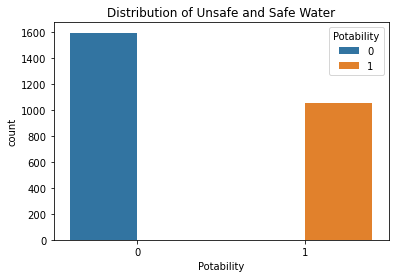

In [8]:
sns.countplot(data["Potability"],hue=data["Potability"])
plt.title("Distribution of Unsafe and Safe Water")
plt.show() #data is not balanced

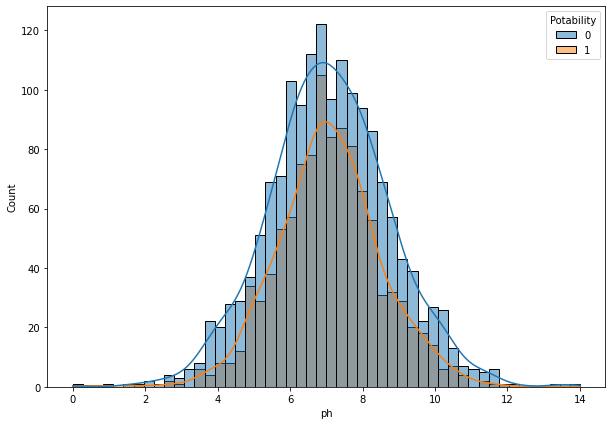

In [9]:
plt.figure(figsize=(10,7))
sns.histplot(data = data, x = "ph", color = "red", label= "Factors Affecting Water Quality: PH" ,
             kde=True,hue="Potability")
plt.show()


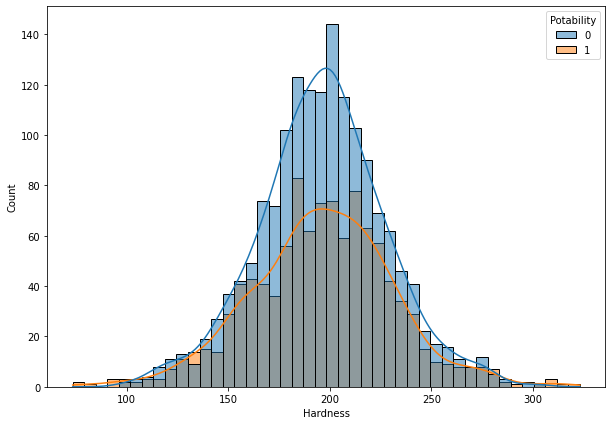

In [10]:
plt.figure(figsize=(10,7))
sns.histplot(data = data, x = "Hardness", color = "red", label= "Factors Affecting Water Quality: PH" ,
             kde=True,hue="Potability")
plt.show()


<AxesSubplot:xlabel='Hardness', ylabel='Solids'>

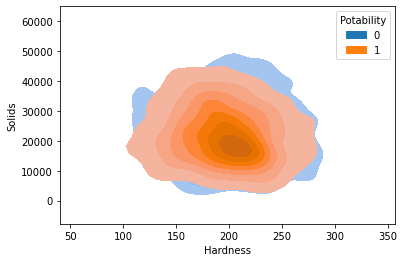

In [42]:
sns.kdeplot(x=data["Hardness"],y=data["Solids"],hue=data["Potability"],shade=True)

In [11]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.085314
Organic_carbon     0.044488
Conductivity       0.014995
Trihalomethanes    0.003354
Potability        -0.003855
Chloramines       -0.031966
Turbidity         -0.042763
Solids            -0.091880
Name: ph, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
x = data.drop("Potability",1)
y=data.Potability

In [23]:
x.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,54.917862,2.559708


In [24]:
y.head()

1    0
2    0
3    0
4    0
5    0
Name: Potability, dtype: int64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
clf = ExtraTreesClassifier(n_estimators=100)
print(clf)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)


In [27]:
clf.fit(x_train,y_train)
score = clf.score(x_train,y_train)
print("Score :",score)

Score : 1.0


In [28]:
y_pred = clf.predict(x_test)

In [31]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [32]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
1058,0,0
2332,1,0
442,0,0
1822,0,0
1141,1,1


Text(33.0, 0.5, 'True')

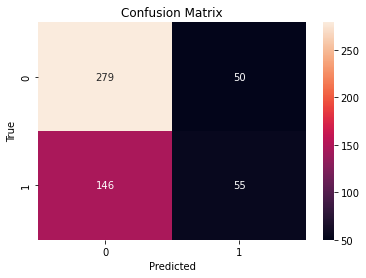

In [34]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred) #true,predicted
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# print(classification_report(y_test, y_pred))

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       329
           1       0.52      0.27      0.36       201

    accuracy                           0.63       530
   macro avg       0.59      0.56      0.55       530
weighted avg       0.61      0.63      0.60       530



In [47]:
data

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821,1
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658,1


In [51]:
#Entering the Data collected with water sample and entering a model

input_data = (7.119824384, 156.7049933, 18730.81365, 3.606036091,
              347.7150273,15.92953591,79.50077834,3.445756223)
input_data_array = np.array(input_data).reshape(1,-1)

#reshape the numpy array as we predicting for one instance

prediction = clf.predict(input_data_array)

if prediction==0:
    print("Water is not drinkable")
else:
    print("Water is drinkable")

Water is not drinkable
